# Linear Regression with scikit-learn

Adapted from the original documentation.

Author: Umberto Michelucci, TOELT LLC

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Load the dataset (ingest)

In this notebook we will use the diabetes dataset.

The Diabetes dataset is a commonly used dataset for regression analysis. This dataset is publicly available and is frequently used for educational and benchmarking purposes in the field of data science and machine learning. Here is a detailed description:

### Overview
- The Diabetes dataset contains ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements taken from a group of diabetes patients.
- It is a standard dataset used for understanding and practicing regression techniques in machine learning.
- The dataset is relatively small, making it suitable for beginners and for testing algorithms quickly.

### Composition
- **Data Points**: It typically includes 442 patients' records.
- **Features**: There are a total of ten baseline variables, some of which are physiological and others are laboratory measurements.
- **Target Variable**: The quantitative measure of disease progression one year after baseline.
- **No Missing Values**: The dataset is clean and does not contain missing values, which simplifies preprocessing steps.

### Usage
- **Regression Analysis**: It is primarily used for regression tasks where the goal is to predict the disease progression based on the baseline measurements.
- **Benchmarking**: Due to its simplicity and well-understood characteristics, it's often used to benchmark performance of various regression algorithms.
- **Educational Tool**: The dataset is an excellent tool for teaching machine learning concepts, especially regression analysis.

### Format
- The dataset is available in multiple formats and can be easily loaded using popular data science libraries like scikit-learn in Python.

### Example of Loading in Python
```python
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
```

### Challenges
- Despite its simplicity, the dataset presents challenges like feature selection and understanding the impact of each feature on disease progression, making it a good starting point for practicing these skills.


In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [3]:
diabetes_X.shape

(442, 10)

From the previous line you can see how the dataset has 10 featuers (or columns).

## Select the features (data preparation)

## Notes about ```np.newaxis```

`np.newaxis` is a special index used in NumPy. It's used to increase the dimension of an existing array by one dimension, when used once. This is typically used to convert a one-dimensional array into a two-dimensional row or column matrix, or to increase the dimensionality of an array by one, at a specified axis.

### Key Aspects of `np.newaxis`

1. **Functionality**:
   - `np.newaxis` is used within array indexing to create an additional dimension in a NumPy array. For example, if you have a 1D array of shape `(n,)` and you index it using `np.newaxis`, you can reshape it to either `(1, n)` or `(n, 1)`.

2. **Common Usage Scenarios**:
   - **Reshaping for Mathematical Operations**: Often in linear algebra or in operations with arrays, you need to explicitly convert a 1D array into a row or column vector. This is particularly common when dealing with vectors and matrices in machine learning algorithms.
   - **Broadcasting**: In operations involving arrays of different dimensions, `np.newaxis` can be used to reshape arrays for broadcasting to make their dimensions compatible.

3. **Examples**:
   - Convert a 1D array to a column vector:
     ```python
     import numpy as np
     a = np.array([1, 2, 3])
     column_vector = a[:, np.newaxis]
     ```
     `column_vector` will have the shape `(3, 1)`.
   - Convert a 1D array to a row vector:
     ```python
     row_vector = a[np.newaxis, :]
     ```
     `row_vector` will have the shape `(1, 3)`.

4. **Difference from `reshape`**:
   - While `reshape` can also be used to change the dimensions of an array, `np.newaxis` is a quick and easy way to increase dimensions, especially handy in complex expressions where readability is a concern.

5. **Compatibility with Python's `None`**:
   - `np.newaxis` is actually an alias for `None`. So, using `None` in place of `np.newaxis` will yield the same results. This can be particularly useful for concise code writing.

### Example in Context

Consider a scenario in machine learning where you have a 1D array of features and you need to transform it into a 2D array for matrix operations or compatibility with certain functions or methods that expect inputs of a certain shape. Using `np.newaxis` allows for this transformation in a very intuitive and readable way.


In [5]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

## Hold-out approach (see Lecture on model validation)

In [6]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [7]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

## Train the model

`LinearRegression()` is a function in the scikit-learn library, a popular Python toolkit for machine learning. This function implements linear regression, a fundamental algorithm for regression analysis. Here's a detailed description:

### Overview of `LinearRegression()`
1. **Purpose**: 
   - The `LinearRegression()` function is used to fit a linear model to a dataset. The goal of linear regression is to model the linear relationship between a dependent variable and one or more independent variables.

2. **Functionality**: 
   - It estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable.

### Key Features
1. **Syntax**:
   ```python
   from sklearn.linear_model import LinearRegression
   model = LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
   ```
2. **Parameters**:
   - `fit_intercept`: Boolean, decides whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations.
   - `normalize`: This parameter is deprecated. It previously normalized the regressors (X) before regression by subtracting the mean and dividing by the l2-norm.
   - `copy_X`: If True, X will be copied; else, it may be overwritten.
   - `n_jobs`: The number of jobs to use for computation. `None` means 1, and `-1` means using all processors.

3. **Methods**:
   - `fit(X, y[, sample_weight])`: Fit the linear model to the data.
   - `predict(X)`: Predict using the linear model.
   - `score(X, y[, sample_weight])`: Return the coefficient of determination \(R^2\) of the prediction.

4. **Attributes**:
   - `coef_`: The coefficients of the linear model.
   - `intercept_`: The intercept of the model (if `fit_intercept` is True).

5. **Use Cases**:
   - Suitable for both simple linear regression (one independent variable) and multiple linear regression (more than one independent variable).

6. **Performance**:
   - Efficient for datasets with a large number of features or instances.
   - Performs well on both sparse and dense data.

### Practical Example
```python
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

# Creating and fitting the model
model = LinearRegression().fit(X, y)

# Predicting values
predictions = model.predict(X)

# Model coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
```

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

## Make Predictions and print the results

The `predict()` method in scikit-learn is a commonly used function across various supervised learning algorithms. It is used to make predictions on the data after a model has been trained. Here's a detailed description:

### Overview of `predict()`
1. **Purpose**: 
   - The primary purpose of the `predict()` method is to apply a trained model to new, unseen data and produce predictions. In the context of supervised learning, these predictions correspond to the output variable (or target) that the model has learned to estimate.

2. **Applicability**: 
   - It is used across a wide range of scikit-learn models, including regression models, classifiers, and more. 

### Key Features
1. **Syntax**:
   ```python
   predictions = model.predict(X)
   ```
   - Here, `model` is a trained scikit-learn model, and `X` is the new data for which predictions are needed.

2. **Parameters**:
   - The primary parameter for `predict()` is the input data (`X`). This data should have the same number of features as the data used to train the model and should be formatted similarly (e.g., as a NumPy array or a Pandas DataFrame).

3. **Output**:
   - The output of `predict()` is an array of predicted values corresponding to the input data. In a classification context, these might be class labels; in regression, they are numerical predictions.

4. **Pre-requisites**:
   - The model must be trained using `.fit()` method before calling `predict()`. Attempting to use `predict()` on an untrained model will result in an error.

5. **Use Cases**:
   - Used in both regression (predicting continuous values) and classification (predicting class labels).
   - Commonly used in the final step of a machine learning pipeline, after training and validation.

### Practical Example
```python
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generating synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

# Training the model
model = LinearRegression().fit(X, y)

# Making predictions
predictions = model.predict(X)
```

### Considerations
- The input data for `predict()` should be preprocessed in the same way as the training data (e.g., scaling, encoding).
- For probabilistic models, such as some classifiers, `predict_proba()` can be used instead to get the probability of each class.


### The ```coef_``` parameter

The `coef_` attribute in the `LinearRegression()` class from scikit-learn is a critical parameter that represents the coefficients of the linear regression equation for each feature. Here's a detailed description:

### Overview of `coef_`
1. **Purpose**:
   - In linear regression, the model seeks to fit a linear equation to observed data. The `coef_` attribute represents the coefficients (often denoted as $\beta$) of this equation. Each coefficient indicates the strength and direction of the relationship between a predictor (independent variable) and the target (dependent variable).

2. **Context in Linear Regression**:
   - A linear regression model attempts to predict a target variable as a weighted sum of input features. The general form of the equation is:
     $ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n $
     Here, $ y $ is the target, $ x_1, x_2, ..., x_n $ are input features, and $ \beta_1, \beta_2, ..., \beta_n $ are the coefficients represented by `coef_`. $\beta_0 $ is the intercept.

3. **Interpretation**:
   - The values in `coef_` indicate how much the target variable is expected to increase when the corresponding feature increases by one unit, holding all other features constant.
   - Positive values indicate a positive correlation, while negative values indicate a negative correlation.

4. **Usage**:
   - After training a LinearRegression model, you can access `coef_` to understand the influence of each feature on the prediction. This is crucial for interpreting the model.

### Example
```python
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generating synthetic data
X, y = make_regression(n_features=3, n_samples=100)

# Training the model
model = LinearRegression()
model.fit(X, y)

# Coefficients
print(model.coef_)
```

### Considerations
- The `coef_` attribute is only available after the model has been fit.
- The number of coefficients will match the number of input features. Each coefficient corresponds to a specific feature.
- These coefficients are key to understanding the contribution and importance of each feature to the model's predictions.


In [8]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


## Visualise the results

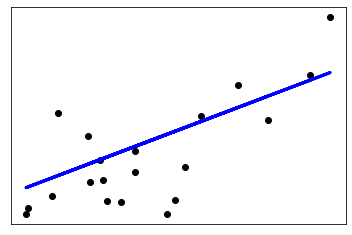

In [9]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Exercises

### Exercise 1

Try to re-do linear regression but with all the features instead of just two and print out all the parameters.

# Appendix A - Broadcasting in Python

Broadcasting in Python, particularly with NumPy arrays, is a powerful concept that allows arithmetic operations to be performed on arrays of different shapes. This process simplifies and speeds up computations without the need for explicit replication of data in memory. Here’s a detailed description:

### What is Broadcasting?
1. **Concept**: Broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. It follows a set of rules to apply binary functions (like addition, multiplication) on arrays of different sizes.

2. **Purpose**: The main goal is to make array arithmetic more convenient and efficient. It enables you to perform operations on arrays of different shapes without needing to match their sizes manually.

### How Broadcasting Works
Broadcasting in NumPy follows a strict set of rules:
1. **Rule 1 - Check Dimensions**: Compare the shapes of the two arrays dimension-wise, starting from the trailing dimensions. Prepend 1 to the shape of the smaller array until both shapes have the same length.
2. **Rule 2 - Compatibility Check**: Two dimensions are compatible when:
   - They are equal, or
   - One of them is 1.
3. **Rule 3 - Stretching Dimensions**: If the dimensions are compatible, stretch the dimension with size 1 to match the other. This stretching does not create new data but acts as a view of the original data.
4. **Rule 4 - Perform Operation**: After stretching dimensions, execute the operation element-wise on the resulting arrays.

### Examples of Broadcasting
1. **Adding a Scalar to an Array**:
   ```python
   import numpy as np
   a = np.array([1, 2, 3])
   b = 2
   c = a + b  # b is broadcasted to array [2, 2, 2]
   ```
2. **Adding Arrays of Different Shapes**:
   ```python
   a = np.array([[1, 2, 3], [4, 5, 6]])  # Shape (2, 3)
   b = np.array([1, 2, 3])              # Shape (3,)
   c = a + b  # b is broadcasted to [[1, 2, 3], [1, 2, 3]]
   ```

### Applications
- **Efficient Computations**: Broadcasting is used for efficient mathematical operations on arrays of different sizes, avoiding the need for loops or vectorized operations.
- **Memory Optimization**: It minimizes memory usage as it doesn’t require replicating the data.
- **Widely Used in Data Science and Machine Learning**: Operations like normalizing data, applying functions across arrays, etc., often use broadcasting.

### Limitations
- If two arrays are not compatible according to the broadcasting rules, a `ValueError` is raised.
- Understanding the implicit behavior of broadcasting can sometimes be challenging, especially in complex operations.
